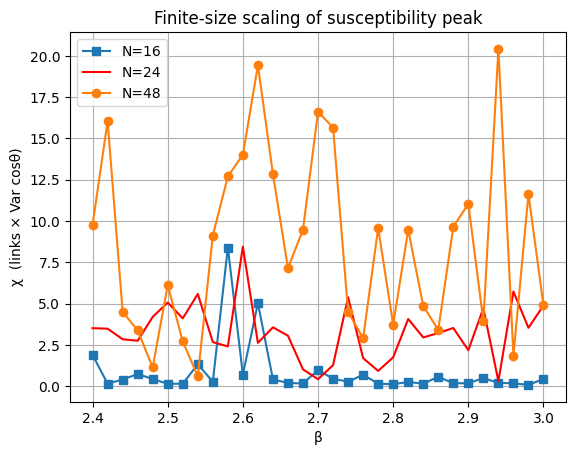

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df16 = pd.read_csv("scan_16nodes.csv")
df24 = pd.read_csv("scan_24nodes.csv")
df48 = pd.read_csv("scan_48nodes.csv")
#df = pd.read_csv("scan_results.csv")

#plt.plot(df["beta"], df["susceptibility"], "r-", label="N=24")
plt.plot(df16["beta"], df16["susceptibility"], "s-", label="N=16")
plt.plot(df24["beta"], df24["susceptibility"], "r-", label="N=24")
plt.plot(df48["beta"], df48["susceptibility"], "o-", label="N=48")

plt.xlabel("β")
plt.ylabel("χ  (links × Var cosθ)")
plt.title("Finite-size scaling of susceptibility peak")
plt.legend()
plt.grid()
plt.show()


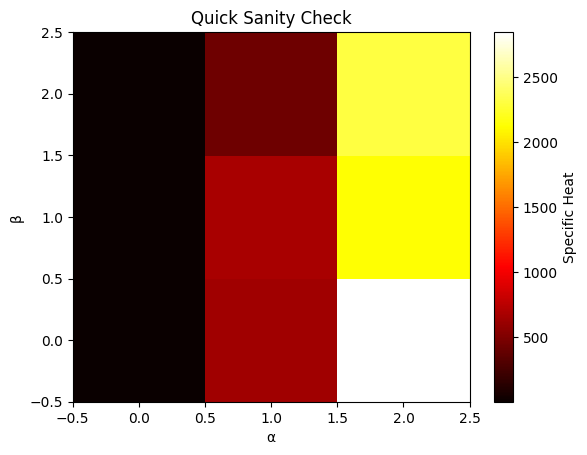

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("quick_test_results.csv")
pivot = df.pivot(index="beta", columns="alpha", values="C")

plt.imshow(pivot, origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Specific Heat')
plt.xlabel('α')
plt.ylabel('β')
plt.title('Quick Sanity Check')
plt.show()

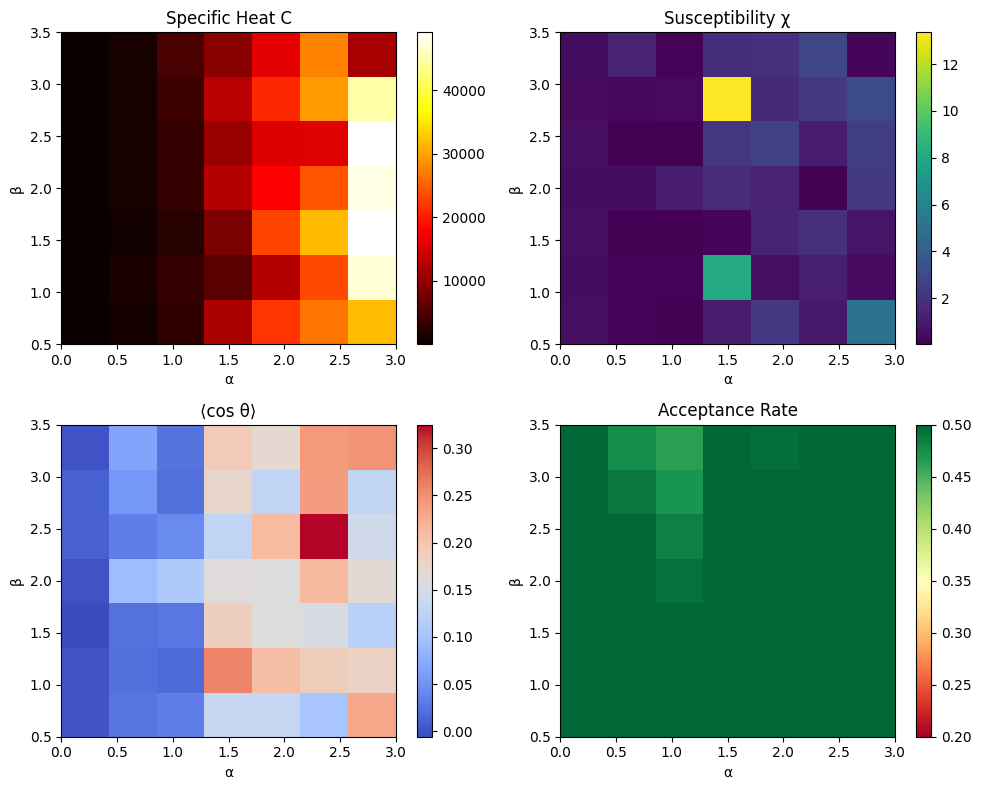


Approximate ridge (max C for each β):
  β=0.5 → α=3.0
  β=1.0 → α=3.0
  β=1.5 → α=3.0
  β=2.0 → α=3.0
  β=2.5 → α=3.0
  β=3.0 → α=3.0
  β=3.5 → α=2.5


In [2]:
# analyze_medium.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("medium_scan_improved.csv")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Specific heat
pivot_c = df.pivot(index="beta", columns="alpha", values="C")
im1 = axes[0,0].imshow(pivot_c, origin='lower', aspect='auto', cmap='hot',
                       extent=[df.alpha.min(), df.alpha.max(), 
                              df.beta.min(), df.beta.max()])
axes[0,0].set_title('Specific Heat C')
axes[0,0].set_xlabel('α'); axes[0,0].set_ylabel('β')
plt.colorbar(im1, ax=axes[0,0])

# Susceptibility
pivot_chi = df.pivot(index="beta", columns="alpha", values="susceptibility")
im2 = axes[0,1].imshow(pivot_chi, origin='lower', aspect='auto', cmap='viridis',
                       extent=[df.alpha.min(), df.alpha.max(), 
                              df.beta.min(), df.beta.max()])
axes[0,1].set_title('Susceptibility χ')
axes[0,1].set_xlabel('α'); axes[0,1].set_ylabel('β')
plt.colorbar(im2, ax=axes[0,1])

# Mean cos theta
pivot_cos = df.pivot(index="beta", columns="alpha", values="mean_cos")
im3 = axes[1,0].imshow(pivot_cos, origin='lower', aspect='auto', cmap='coolwarm',
                       extent=[df.alpha.min(), df.alpha.max(), 
                              df.beta.min(), df.beta.max()])
axes[1,0].set_title('⟨cos θ⟩')
axes[1,0].set_xlabel('α'); axes[1,0].set_ylabel('β')
plt.colorbar(im3, ax=axes[1,0])

# Acceptance rate
pivot_acc = df.pivot(index="beta", columns="alpha", values="acc_rate")
im4 = axes[1,1].imshow(pivot_acc, origin='lower', aspect='auto', cmap='RdYlGn',
                       vmin=0.2, vmax=0.5,
                       extent=[df.alpha.min(), df.alpha.max(), 
                              df.beta.min(), df.beta.max()])
axes[1,1].set_title('Acceptance Rate')
axes[1,1].set_xlabel('α'); axes[1,1].set_ylabel('β')
plt.colorbar(im4, ax=axes[1,1])

plt.tight_layout()
plt.savefig('medium_improved_analysis.png', dpi=150)
plt.show()

# Find approximate ridge
c_max_indices = pivot_c.idxmax(axis=1)
print("\nApproximate ridge (max C for each β):")
for beta, alpha in c_max_indices.items():
    print(f"  β={beta:.1f} → α={alpha:.1f}")